In [52]:
# load data for 2022
import pandas as pd

filepath = "source/mansueto/dfc_addpno_pm_pin_geo_desc_met_munci_tract_category_2022_06_22.parquet"

df = pd.read_parquet(filepath, columns=['pin','property_address','mailing_name','mailing_street','property_street','is_org','class','exe_homeowner','class_desc','is_same_address','is_homeowner','tax_year','tract_GEOID','munci_comm'])

In [11]:
# look at chatham census tract that maya found pangea in

in_universe = df.loc[
    (df['tract_GEOID'] == '17031440101') &    
    (df['class'].isin([
        '313',                   
        '314',
        '315',
        '318',
        '391',
        '396']))]                

in_universe

,pin,property_address,mailing_name,mailing_street,property_street,is_org,class,exe_homeowner,class_desc,is_same_address,is_homeowner,tax_year,tract_GEOID,munci_comm
1383492,20351000240000,"7954 MARYLAND AVE, ,",7954 56 S MARYLAND LLC,5315 CLARK ST,7954 MARYLAND AVE,1.0,315,0,"Two-or-three-story, non-fireproof corridor apa...",0.0,0.0,2022,17031440101,CHATHAM
1383498,20351010040000,"7919 MARYLAND AVE, ,",7919 S MARYLAND LLC,1200 35TH ST,7919 MARYLAND AVE,1.0,315,0,"Two-or-three-story, non-fireproof corridor apa...",0.0,0.0,2022,17031440101,CHATHAM
1383506,20351010120000,"7957 MARYLAND AVE, ,",MG MIDWEST PROPERTIES,70 MADISON ST,7957 MARYLAND AVE,1.0,314,0,"Two-or-three-story, non-fireproof building wit...",0.0,0.0,2022,17031440101,CHATHAM
1383507,20351010130000,"7900 DREXEL AVE, ,",WILSON PROPERTY MGMT,2035 GIDDINGS ST,7900 DREXEL AVE,1.0,318,0,Mixed-use commercial/residential building with...,0.0,0.0,2022,17031440101,CHATHAM
1383519,20351010290000,"7958 DREXEL AVE, ,",BRANKO SOPCIC,2633 ROYAL RIDGE DR,7958 DREXEL AVE,0.0,315,0,"Two-or-three-story, non-fireproof corridor apa...",0.0,0.0,2022,17031440101,CHATHAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384189,20351180020000,"8107 ELLIS AVE, ,",ABUNDANCE PROPERTIES,542 DEARBORN,8107 ELLIS AVE,1.0,314,0,"Two-or-three-story, non-fireproof building wit...",0.0,0.0,2022,17031440101,CHATHAM
1384190,20351180030000,"8109 ELLIS AVE, ,",ABUNDANCE PROP LLC,542 DEARBORN,8109 ELLIS AVE,1.0,314,0,"Two-or-three-story, non-fireproof building wit...",0.0,0.0,2022,17031440101,CHATHAM
1384197,20351180100000,"8129 ELLIS AVE, ,",PP P9 1 LLC,640 LA SALLE,8129 ELLIS AVE,1.0,315,0,"Two-or-three-story, non-fireproof corridor apa...",0.0,0.0,2022,17031440101,CHATHAM
1384198,20351180110000,"8127 ELLIS AVE, ,",PP P9 1 LLC,640 LA SALLE,8127 ELLIS AVE,1.0,315,0,"Two-or-three-story, non-fireproof corridor apa...",0.0,0.0,2022,17031440101,CHATHAM


In [12]:
in_universe.to_csv('test_chatham.csv')

In [114]:
df[df['pin'] == '17331130370000']

,pin,property_address,mailing_name,mailing_street,property_street,is_org,class,exe_homeowner,class_desc,is_same_address,is_homeowner,tax_year,tract_GEOID,munci_comm
1136136,17331130370000,"3246 NORMAL AVE, ,",2G HOLDINGS LLC,540 35TH ST,3246 NORMAL AVE,1.0,211,0,"Two to six residential apartments, any age",0.0,0.0,2022,17031840000,BRIDGEPORT


# Test patterns by census tract against other demographics

In [74]:
# load cleaned census tract data
dft = pd.read_csv('output/is_org_all_years_by_tract.csv')
dft.head(2)

,tract_GEOID,non_org,is_org,pct_is_org,total_parcels,year,class_category,place
0,17031010100,35.0,2.0,0.054054,37.0,2006,single-family,Rogers Park
1,17031010201,110.0,1.0,0.009009,111.0,2006,single-family,Rogers Park


In [75]:
# filter for just 2022
df22 = dft[dft['year'] == 2022].copy()

In [99]:
# add percent change from 06-22
df06 = dft[dft['year'] == 2006].copy()

# merge with df22
df22 = pd.merge(df22, df06[['tract_GEOID', 'pct_is_org']], on='tract_GEOID')

df22.head()

,tract_GEOID,non_org,is_org,pct_is_org_x,total_parcels,year,class_category,place,geoid_x,rent,...,total_housing_units,pct_black,pct_white,pct_latino,clean_geoid,total_tenure,owner_occupied,renter_occupied,pct_renter,pct_is_org_y
0,17031010201,132.0,8.0,0.057143,140.0,2022,single-family,Rogers Park,17031010201,1333,...,3276,0.303242,0.185293,0.345546,1.703101e+10,2190,689,1501,0.685388,0.009009
1,17031010201,132.0,8.0,0.057143,140.0,2022,single-family,Rogers Park,17031010201,1333,...,3276,0.303242,0.185293,0.345546,1.703101e+10,2190,689,1501,0.685388,0.039548
2,17031010201,132.0,8.0,0.057143,140.0,2022,single-family,Rogers Park,17031010201,1333,...,3276,0.303242,0.185293,0.345546,1.703101e+10,2190,689,1501,0.685388,0.035714
3,17031010201,132.0,8.0,0.057143,140.0,2022,single-family,Rogers Park,17031010201,1333,...,3276,0.303242,0.185293,0.345546,1.703101e+10,2190,689,1501,0.685388,0.091391
4,17031010201,132.0,8.0,0.057143,140.0,2022,single-family,Rogers Park,17031010201,1333,...,3276,0.303242,0.185293,0.345546,1.703101e+10,2190,689,1501,0.685388,0.441176


In [ ]:
df22 = df22.rename(columns={'pct_is_org_x': 'pct_is_org', 'pct_is_org_y': 'pct_is_org_06'})

In [105]:
df22['pct_diff'] = df22['pct_is_org'] - df22['pct_is_org_06']

df22.tail()

,tract_GEOID,non_org,is_org,pct_is_org,total_parcels,year,class_category,place,geoid_x,rent,...,pct_black,pct_white,pct_latino,clean_geoid,total_tenure,owner_occupied,renter_occupied,pct_renter,pct_is_org_06,pct_diff
27098,17031844600,7.0,7.0,0.500,14.0,2022,7+ unit properties,Grand Boulevard,17031844600,1309,...,0.747581,0.050132,0.138522,1.703184e+10,2148,931,1217,0.566574,0.700000,-0.200000
27099,17031844700,3.0,5.0,0.625,8.0,2022,7+ unit properties,North Lawndale,17031844700,1350,...,0.677859,0.017314,0.276495,1.703184e+10,851,190,661,0.776733,0.049020,0.575980
27100,17031844700,3.0,5.0,0.625,8.0,2022,7+ unit properties,North Lawndale,17031844700,1350,...,0.677859,0.017314,0.276495,1.703184e+10,851,190,661,0.776733,0.054983,0.570017
27101,17031844700,3.0,5.0,0.625,8.0,2022,7+ unit properties,North Lawndale,17031844700,1350,...,0.677859,0.017314,0.276495,1.703184e+10,851,190,661,0.776733,0.000000,0.625000
27102,17031844700,3.0,5.0,0.625,8.0,2022,7+ unit properties,North Lawndale,17031844700,1350,...,0.677859,0.017314,0.276495,1.703184e+10,851,190,661,0.776733,0.333333,0.291667


# Median gross rent

In [17]:
# table B25064 by 2020 census tract for cook county - 2023 5 year acs
rent = pd.read_csv('../census-data/median_gross_rent_by_tract_cook_ACSDT5Y2023.B25064.csv', skiprows=1, header=0, usecols=[1,3,4], names=['geoid', 'rent', 'moe'])

In [18]:
rent.head()

,geoid,rent,moe
0,17031010100,1252,258
1,17031010201,1333,129
2,17031010202,1292,116
3,17031010300,1257,162
4,17031010400,1248,206


In [76]:
# merge with tract data for 2022
df22 = pd.merge(df22, rent, left_on='tract_GEOID', right_on='geoid')

In [23]:
df22.tail(2)

,tract_GEOID,non_org,is_org,pct_is_org,total_parcels,year,class_category,place,geoid,rent,moe
5952,17031844600,7.0,7.0,0.500,14.0,2022,7+ unit properties,Grand Boulevard,17031844600,1309,142
5953,17031844700,3.0,5.0,0.625,8.0,2022,7+ unit properties,North Lawndale,17031844700,1350,286


<AxesSubplot:xlabel='rent', ylabel='pct_is_org'>

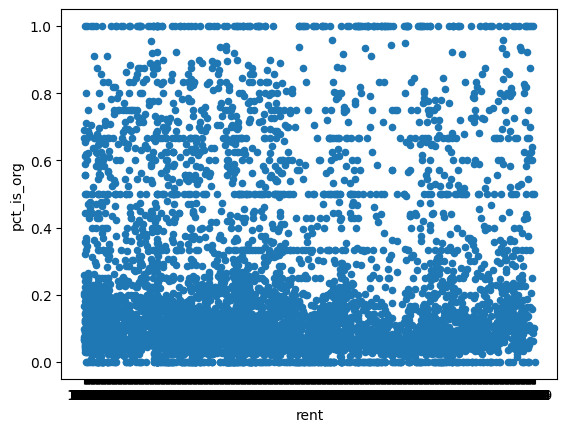

In [24]:
# all properties
df22.plot.scatter(x='rent', y='pct_is_org')

In [25]:
df22.groupby('class_category')['total_parcels'].median()

class_category
2-6 unit properties     93.0
7+ unit properties      10.0
condo                  185.0
other residential       73.0
single-family          389.0
Name: total_parcels, dtype: float64

In [26]:
df22.groupby('class_category')['total_parcels'].mean()

class_category
2-6 unit properties    134.980944
7+ unit properties      14.846709
condo                  436.726388
other residential      205.315350
single-family          531.783012
Name: total_parcels, dtype: float64

Corporate ownership impacts Cook County renters accross in both high and low rent census tracts

<AxesSubplot:xlabel='rent', ylabel='pct_is_org'>

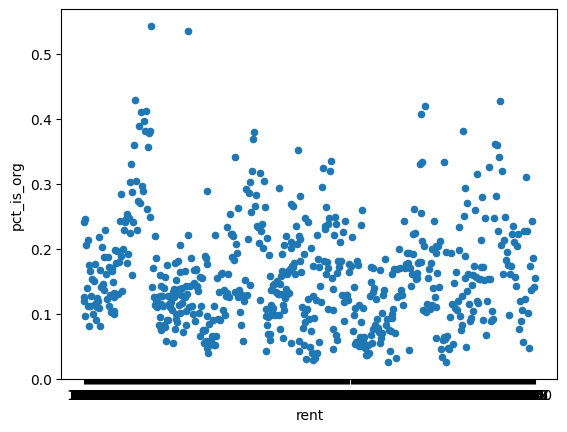

In [29]:
# 2-6 unit properties in tracts with greater than 93 parcels (median) by 2023 rent
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='rent', y='pct_is_org')

<AxesSubplot:xlabel='rent', ylabel='pct_is_org'>

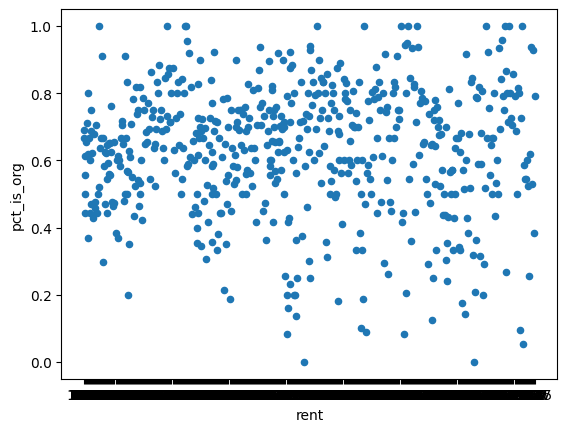

In [30]:
# look at just 7+ unit properties in tracts with greater than 10 parcels
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 10)].plot.scatter(x='rent', y='pct_is_org')

In [103]:
df22['pct_diff'].describe()

count    27103.000000
mean         0.090933
std          0.300281
min         -1.000000
25%         -0.019255
50%          0.044976
75%          0.170594
max          1.000000
Name: pct_diff, dtype: float64

<AxesSubplot:xlabel='rent', ylabel='pct_diff'>

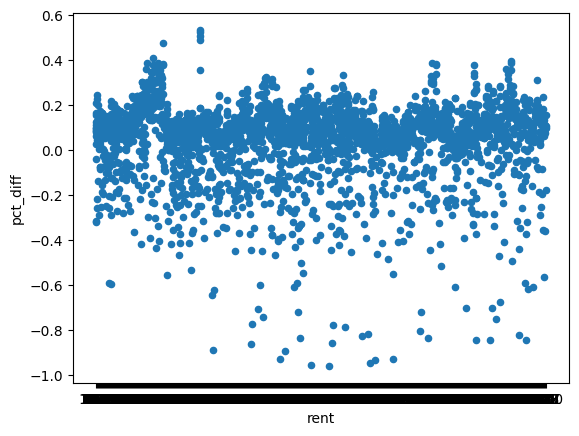

In [102]:
# 2-6 unit properties in tracts with greater than 93 parcels (median) by 2023 rent
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='rent', y='pct_diff')

<AxesSubplot:xlabel='rent', ylabel='pct_diff'>

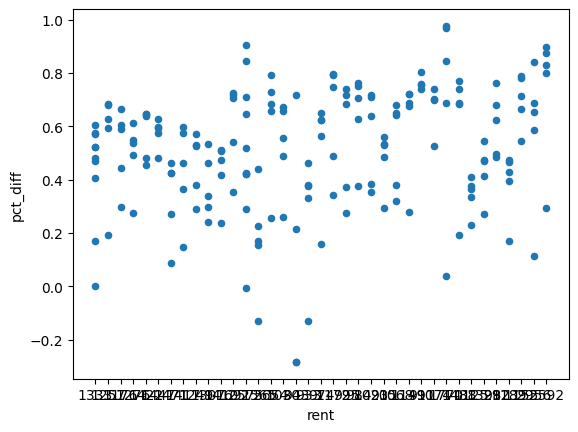

In [106]:
# look at just 7+ unit properties in tracts with greater than 10 parcels
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 50)].plot.scatter(x='rent', y='pct_diff')

## % Black, Latino, white, etc.

In [69]:
# table DP05 by 2020 census tract for cook county - 2023 5 year acs
race = pd.read_csv('../census-data/race_sex_by_tract_cook_ACSDP5Y2023.DP05.csv', header=0, usecols=['clean_geoid',
                                                                                                   'DP05_0001E',
                                                                                                   'DP05_0076E',
                                                                                                   'DP05_0082E',
                                                                                                   'DP05_0083E',
                                                                                                   'DP05_0085E',
                                                                                                   'DP05_0091E'])

In [70]:
race.head()

,clean_geoid,DP05_0001E,DP05_0076E,DP05_0082E,DP05_0083E,DP05_0085E,DP05_0091E
0,clean_geoid,Estimate!!SEX AND AGE!!Total population,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,Estimate!!Total housing units
1,17031010100,3726,809,1297,1376,137,2841
2,17031010201,7588,2622,1406,2301,376,3276
3,17031010202,2609,423,967,949,212,1303
4,17031010300,6311,1426,3094,1298,342,3377


In [71]:
# clean up 
race = race.drop(0)
names=['geoid', 'total', 'latino', 'white', 'black', 'asian', 'total_housing_units']
race.columns = names

race.head(2)

,geoid,total,latino,white,black,asian,total_housing_units
1,17031010100,3726,809,1297,1376,137,2841
2,17031010201,7588,2622,1406,2301,376,3276


In [72]:
cols=[i for i in race.columns]
for col in cols:
    race[col]=pd.to_numeric(race[col])

race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 1 to 1332
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   geoid                1332 non-null   int64
 1   total                1332 non-null   int64
 2   latino               1332 non-null   int64
 3   white                1332 non-null   int64
 4   black                1332 non-null   int64
 5   asian                1332 non-null   int64
 6   total_housing_units  1332 non-null   int64
dtypes: int64(7)
memory usage: 73.0 KB


In [73]:
# add pcts
race['pct_black'] = race['black']/race['total']
race['pct_white'] = race['white']/race['total']
race['pct_latino'] = race['latino']/race['total']

In [77]:
# merge with tract data for 2022
df22 = pd.merge(df22, race, left_on='tract_GEOID', right_on='geoid')

In [78]:
# check
df22[df22['tract_GEOID'] == 17031440101]

,tract_GEOID,non_org,is_org,pct_is_org,total_parcels,year,class_category,place,geoid_x,rent,...,geoid_y,total,latino,white,black,asian,total_housing_units,pct_black,pct_white,pct_latino
434,17031440101,43.0,4.0,0.085106,47.0,2022,single-family,Chatham,17031440101,1023,...,17031440101,3987,31,6,3796,34,2817,0.952094,0.001505,0.007775
1737,17031440101,157.0,50.0,0.241546,207.0,2022,2-6 unit properties,Chatham,17031440101,1023,...,17031440101,3987,31,6,3796,34,2817,0.952094,0.001505,0.007775
2950,17031440101,33.0,7.0,0.175000,40.0,2022,other residential,Chatham,17031440101,1023,...,17031440101,3987,31,6,3796,34,2817,0.952094,0.001505,0.007775
4239,17031440101,53.0,43.0,0.447917,96.0,2022,condo,Chatham,17031440101,1023,...,17031440101,3987,31,6,3796,34,2817,0.952094,0.001505,0.007775
5284,17031440101,20.0,70.0,0.777778,90.0,2022,7+ unit properties,Chatham,17031440101,1023,...,17031440101,3987,31,6,3796,34,2817,0.952094,0.001505,0.007775


<AxesSubplot:xlabel='pct_black', ylabel='pct_is_org'>

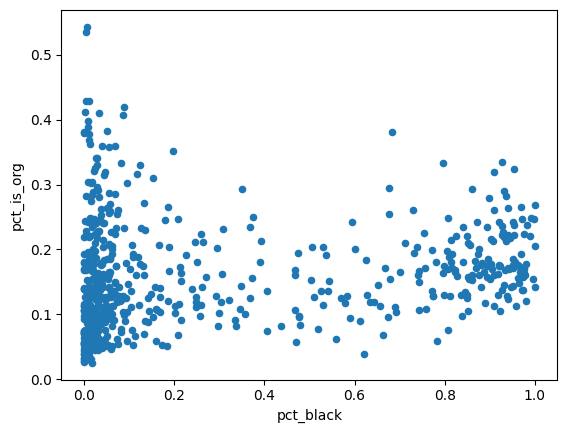

In [79]:
# look at just 2-6 unit properties in tracts with greater than 93 parcels
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='pct_black', y='pct_is_org')

<AxesSubplot:xlabel='pct_black', ylabel='pct_is_org'>

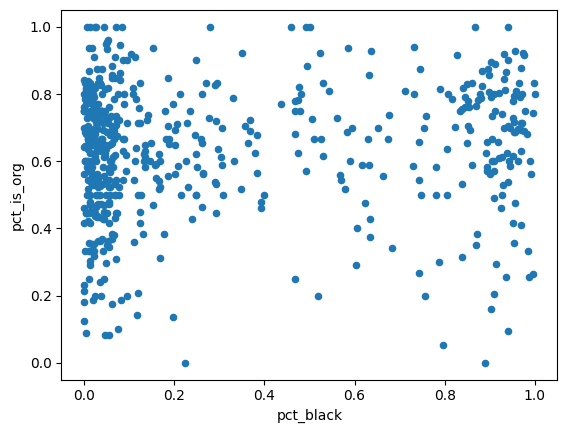

In [80]:
# look at just 7+ unit properties in tracts with greater than 10 parcels
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 10)].plot.scatter(x='pct_black', y='pct_is_org')

<AxesSubplot:xlabel='pct_black', ylabel='pct_diff'>

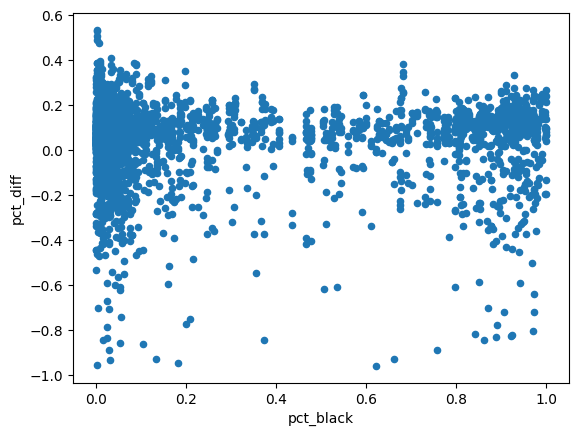

In [108]:
# 2-6 unit properties in tracts with greater than 93 parcels (median) by 2023 rent
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='pct_black', y='pct_diff')

<AxesSubplot:xlabel='pct_black', ylabel='pct_diff'>

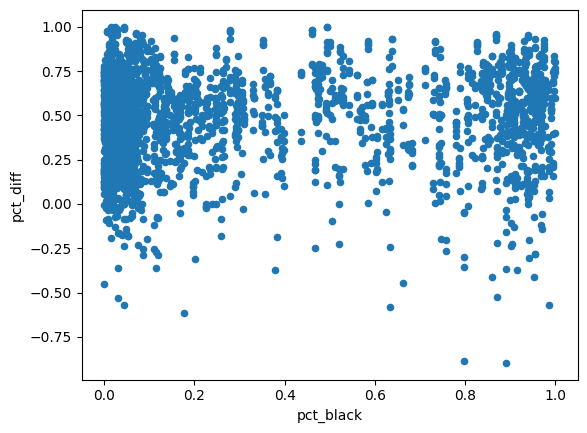

In [109]:
# 2-6 unit properties in tracts with greater than 93 parcels (median) by 2023 rent
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 10)].plot.scatter(x='pct_black', y='pct_diff')

<AxesSubplot:xlabel='pct_latino', ylabel='pct_is_org'>

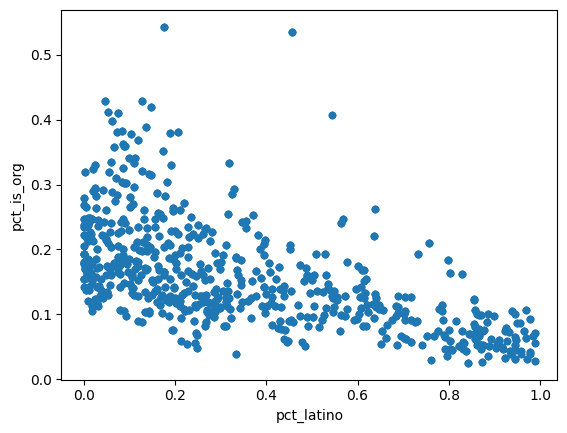

In [116]:
# look at just 2-6 unit properties in tracts with greater than 93 parcels
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='pct_latino', y='pct_is_org')

<AxesSubplot:xlabel='pct_latino', ylabel='pct_is_org'>

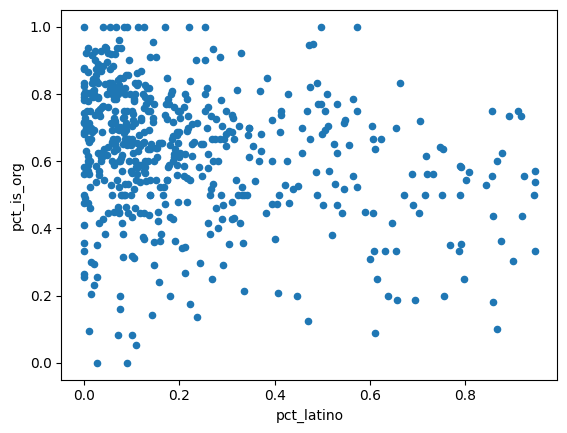

In [82]:
# look at just 7+ unit properties in tracts with greater than 10 parcels
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 10)].plot.scatter(x='pct_latino', y='pct_is_org')

<AxesSubplot:xlabel='pct_latino', ylabel='pct_diff'>

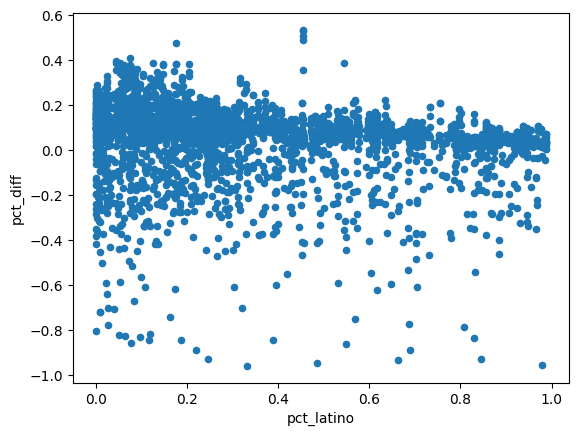

In [110]:
# look at just 2-6 unit properties in tracts with greater than 93 parcels
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='pct_latino', y='pct_diff')

<AxesSubplot:xlabel='pct_white', ylabel='pct_is_org'>

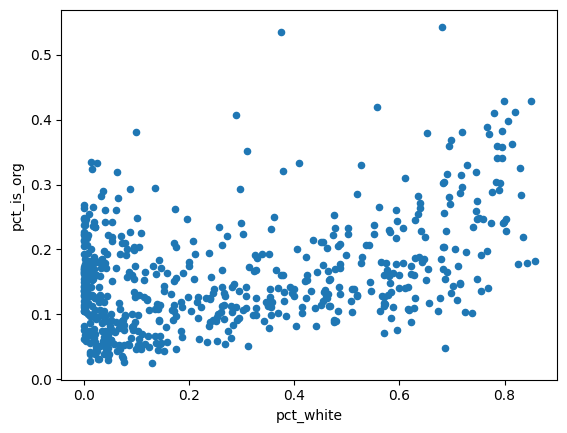

In [83]:
# look at just 2-6 unit properties in tracts with greater than 93 parcels
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='pct_white', y='pct_is_org')

<AxesSubplot:xlabel='pct_white', ylabel='pct_is_org'>

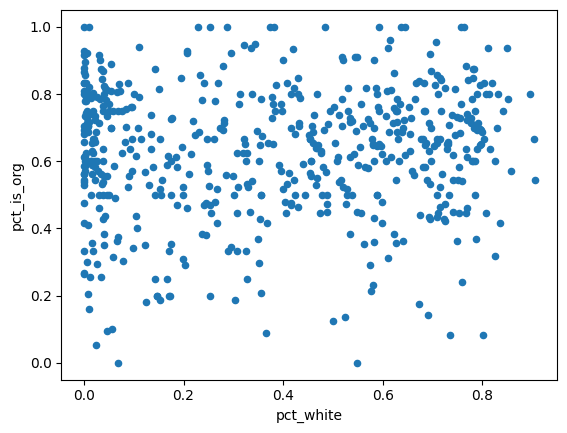

In [84]:
# look at just 7+ unit properties in tracts with greater than 10 parcels
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 10)].plot.scatter(x='pct_white', y='pct_is_org')

<AxesSubplot:xlabel='pct_white', ylabel='pct_diff'>

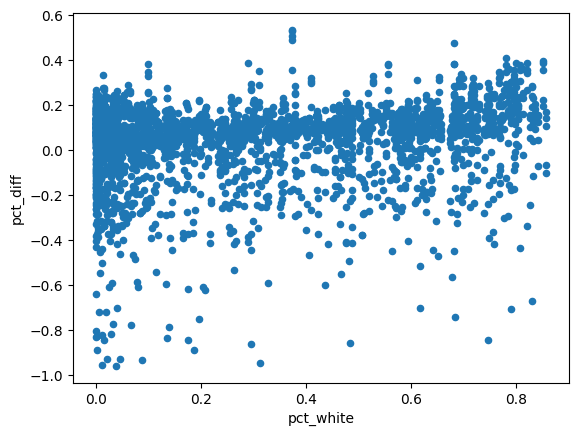

In [111]:
# look at just 2-6 unit properties in tracts with greater than 93 parcels
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='pct_white', y='pct_diff')

<AxesSubplot:xlabel='pct_white', ylabel='pct_diff'>

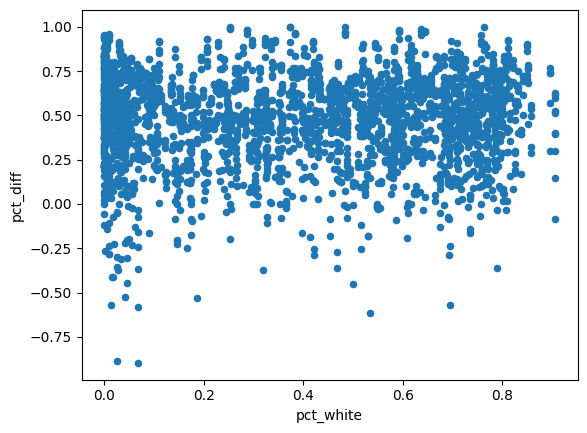

In [112]:
# look at just 7+ unit properties in tracts with greater than 10 parcels
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 10)].plot.scatter(x='pct_white', y='pct_diff')

Census tracts with a high share of white or black residents tend to have higher rates of corporate ownership and tended to see greater increases in corporate ownership from 2006-2022, whereas tracts with a higher share of hispanic residents tend to have lower rates of corporate ownership and tended to see smaller increases in corporate ownership.

## Housing units

Denser census tracts kinda tend to have slightly higher rates of corporate ownership

<AxesSubplot:xlabel='total_housing_units', ylabel='pct_is_org'>

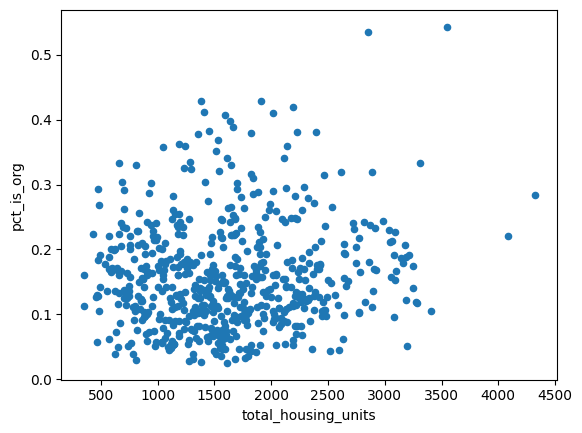

In [86]:
# look at just 2-6 unit properties in tracts with greater than 93 parcels
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='total_housing_units', y='pct_is_org')

<AxesSubplot:xlabel='total_housing_units', ylabel='pct_is_org'>

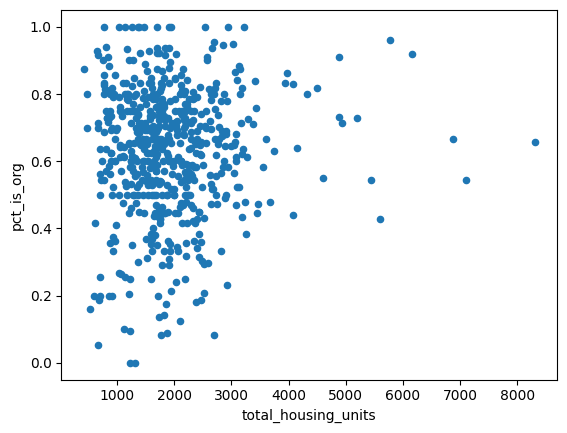

In [87]:
# look at just 7+ unit properties in tracts with greater than 10 parcels
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 10)].plot.scatter(x='total_housing_units', y='pct_is_org')

## Tenure

In [90]:
tenure = pd.read_csv('../census-data/tenure_by_tract_cook_ACSDT5Y2023.B25003.csv', skiprows=1, header=0, usecols=['clean_geoid', 'Estimate!!Total:', 'Estimate!!Total:!!Owner occupied', 'Estimate!!Total:!!Renter occupied'])

In [92]:
tenure.columns = ['clean_geoid', 'total_tenure', 'owner_occupied', 'renter_occupied']

In [93]:
# add pcts
tenure['pct_renter'] = tenure['renter_occupied']/tenure['total_tenure']

In [94]:
# merge with tract data for 2022
df22 = pd.merge(df22, tenure, left_on='tract_GEOID', right_on='clean_geoid')

<AxesSubplot:xlabel='pct_renter', ylabel='pct_is_org'>

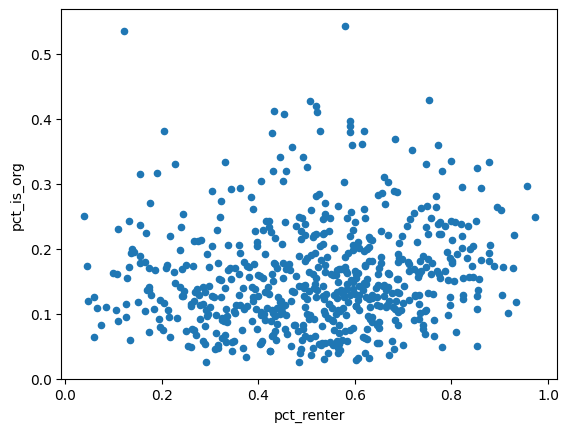

In [95]:
# look at just 2-6 unit properties in tracts with greater than 93 parcels
df22[(df22['class_category'] == '2-6 unit properties') & (df22['total_parcels'] >= 93)].plot.scatter(x='pct_renter', y='pct_is_org')

<AxesSubplot:xlabel='pct_renter', ylabel='pct_is_org'>

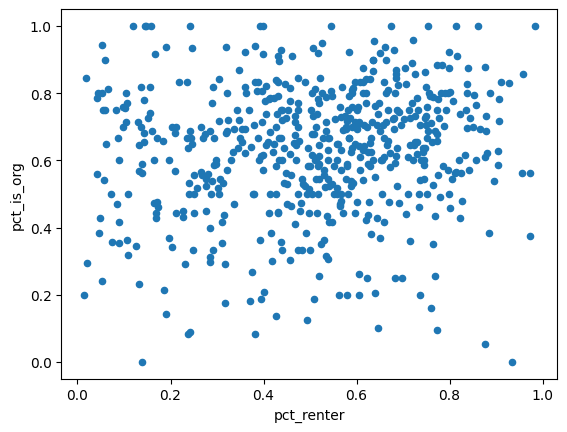

In [96]:
# look at just 7+ unit properties in tracts with greater than 10 parcels
df22[(df22['class_category'] == '7+ unit properties') & (df22['total_parcels'] >= 10)].plot.scatter(x='pct_renter', y='pct_is_org')

## Income

S1901 income in the last 12 months

In [ ]:
# TK places that have seen the largest increases in corporate ownership as X axis?

# immigrant 

# how long a tenant has lived at an address?

# transaction frequency?